# About the dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading dataset

In [2]:
df=pd.read_csv("loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

## convert to date time object

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df

,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...
341,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [7]:
df.drop(["Unnamed: 0.1"], axis = 1, inplace = True)

In [8]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


## data visualisation and preprocessing

Let’s see how many of each class is in our data set

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection

Lets plot some columns to underestand data better:

In [10]:
import seaborn as sns


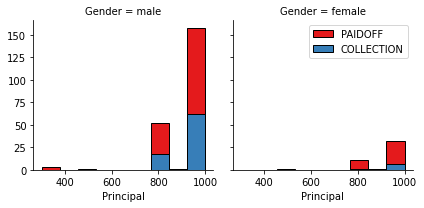

In [11]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

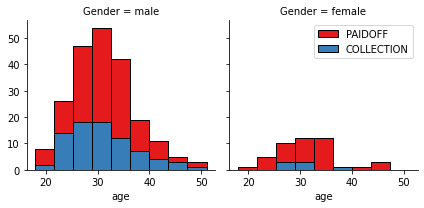

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

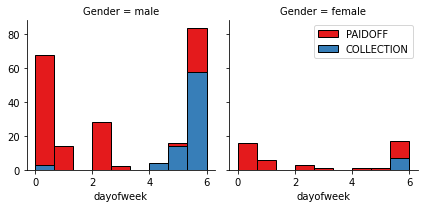

In [14]:
#looking at each day of the week people get loan
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### from the above graph we can interpret that people who get the loan at the end of the week do not pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Convert categorical features to numerical values

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head() #converting male to 0 and female to 1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## one hot encoding

In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [19]:
df[['Principal','terms','age','Gender','education']]

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college
...,...,...,...,...,...
341,800,15,32,0,High School or Below
342,1000,30,25,0,High School or Below
343,800,15,39,0,college
344,1000,30,28,0,college


In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
#splitting education generating 3 diff columns bachelor high school college and dropping master or above

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection

In [21]:
X = Feature
X[0:5]
X

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Feature Scaling (Normalization) of data

In [23]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification models 

1. Logisic Regression
2. K-Nearest Neighbour
3. SVM
4. Decision Tree

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


In [25]:
X_train

array([[ 0.51578458,  0.92071769, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [-1.31458942,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769,  0.50752015, ...,  2.61985426,
        -0.87997669, -0.86968108],
       ...,
       [ 0.51578458, -0.95911111,  2.66316289, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.65321055, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -1.81394125, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [26]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob


array([[0.50821027, 0.49178973],
       [0.49261803, 0.50738197],
       [0.48910263, 0.51089737],
       [0.34032175, 0.65967825],
       [0.49648296, 0.50351704],
       [0.3083067 , 0.6916933 ],
       [0.32404224, 0.67595776],
       [0.46680355, 0.53319645],
       [0.33439657, 0.66560343],
       [0.43755531, 0.56244469],
       [0.45691992, 0.54308008],
       [0.30553875, 0.69446125],
       [0.47471044, 0.52528956],
       [0.45323462, 0.54676538],
       [0.34242683, 0.65757317],
       [0.34441903, 0.65558097],
       [0.4591153 , 0.5408847 ],
       [0.46464071, 0.53535929],
       [0.27729496, 0.72270504],
       [0.50213677, 0.49786323],
       [0.47140686, 0.52859314],
       [0.47980152, 0.52019848],
       [0.28905811, 0.71094189],
       [0.33538054, 0.66461946],
       [0.50544978, 0.49455022],
       [0.31083137, 0.68916863],
       [0.50821027, 0.49178973],
       [0.47980152, 0.52019848],
       [0.46185906, 0.53814094],
       [0.46460513, 0.53539487],
       [0.

## Evaluation
### jaccard index
#### Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.7926829268292683

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob)) ##logloss score

LogLoss: : 0.55


# KNN

In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.73563218, 0.71264368, 0.75862069, 0.73563218, 0.79310345,
       0.7816092 , 0.79310345, 0.7816092 , 0.77011494])

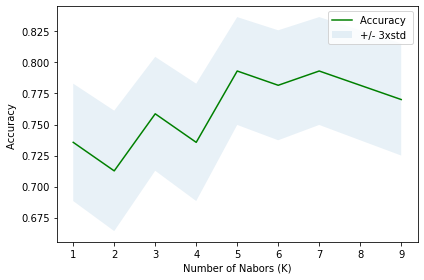

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
k = 6
neighK6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK6
 
yhat = neighK6.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [33]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.7432432432432432

In [34]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob)) ##logloss score

LogLoss: : 0.63


# Decision Tree

In [43]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.25, random_state=3)
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(259, 8)
(259,)
(87, 8)
(87,)


In [44]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_trainset,y_trainset)
predTree = loanTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
DecisionTrees's Accuracy:  0.6436781609195402


# SVM

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


In [52]:
# 1. Radial Basis Function (RBF)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]
print(yhat[0:5])


['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [55]:
# 2. Linear
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label = "PAIDOFF"))

Avg F1-score: 0.6369
Jaccard score: 0.5949


              precision    recall  f1-score   support

  COLLECTION       0.41      0.30      0.35        23
     PAIDOFF       0.77      0.84      0.81        64

    accuracy                           0.70        87
   macro avg       0.59      0.57      0.58        87
weighted avg       0.68      0.70      0.69        87

Confusion matrix, without normalization
[[ 7 16]
 [10 54]]


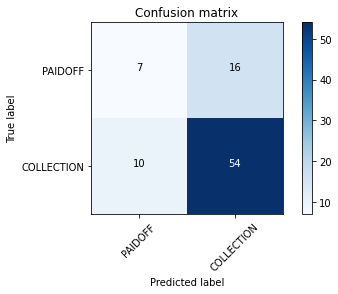

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set

In [59]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [60]:
import pandas as pd
test_df = pd.read_csv('loan_test.csv')

In [61]:
test_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [62]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_df
test_Feature

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0
5,700,15,33,0,1,0,1,0
6,1000,15,24,0,1,0,0,1
7,1000,30,32,0,1,1,0,0
8,800,15,27,1,1,0,0,1
9,1000,15,37,0,1,0,0,1


In [63]:
# Normalization
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86],
       [-1.24, -0.79,  0.2 , -0.51,  0.77, -0.42,  1.25, -0.86],
       [ 0.49, -0.79, -1.32, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49,  0.93,  0.03, -0.51,  0.77,  2.4 , -0.8 , -0.86],
       [-0.67, -0.79, -0.81,  1.98,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49, -0.79,  0.87, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -1.32, -0.51,  0.77, -0.42,  1.25, -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49,  0.93, -0.14, -0.51,  0.77,  2.4 , -0.8 , -0.86],
       [ 0.49,  0.93,  0.87,  1.98,  0.77, -0.42, -0.8 ,  1.16],
       [ 0.49,  0.93,  0.87,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93,  0.

In [64]:
testset=test_df['loan_status'].values
testset

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

In [67]:
# Logistic Regression
from sklearn.metrics import classification_report
yhatlr = LR.predict(test_X)
yhatlr_prob = LR.predict_proba(test_X)
print("%.2f" % log_loss(testset,yhatlr_prob))
print (classification_report(testset, yhatlr))
print("%.2f" % jaccard_score(testset, yhatlr, pos_label="PAIDOFF"))

0.58
              precision    recall  f1-score   support

  COLLECTION       1.00      0.21      0.35        14
     PAIDOFF       0.78      1.00      0.88        40

    accuracy                           0.80        54
   macro avg       0.89      0.61      0.62        54
weighted avg       0.84      0.80      0.74        54

0.78


In [69]:
# KNN

yhatKNN=neigh.predict(test_X)
KNNJaccard = jaccard_score(testset, yhatKNN,pos_label="PAIDOFF")
KNNF1 = f1_score(testset, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

Avg F1-score: 0.64
KNN Jaccard Score: 0.70


In [70]:
#SVM

yhatSVM=clf.predict(X)
SVMJaccard = jaccard_score(y, yhatSVM, pos_label="PAIDOFF")
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)

Avg F1-score: 0.77
SVM Jaccard score: 0.76


In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
Decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Decisiontree.fit(test_X,testset)
yhatdt = Decisiontree.predict(test_X)
print (classification_report(testset, yhatdt))
print("%.2f" % jaccard_score(testset, yhatdt,pos_label="PAIDOFF"))

              precision    recall  f1-score   support

  COLLECTION       0.67      0.71      0.69        14
     PAIDOFF       0.90      0.88      0.89        40

    accuracy                           0.83        54
   macro avg       0.78      0.79      0.79        54
weighted avg       0.84      0.83      0.84        54

0.80
